# Ключевые точки на изображении

In [ ]:
import cv2 as cv
import numpy as np
#import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
folder = "drive/MyDrive/cv_data/"

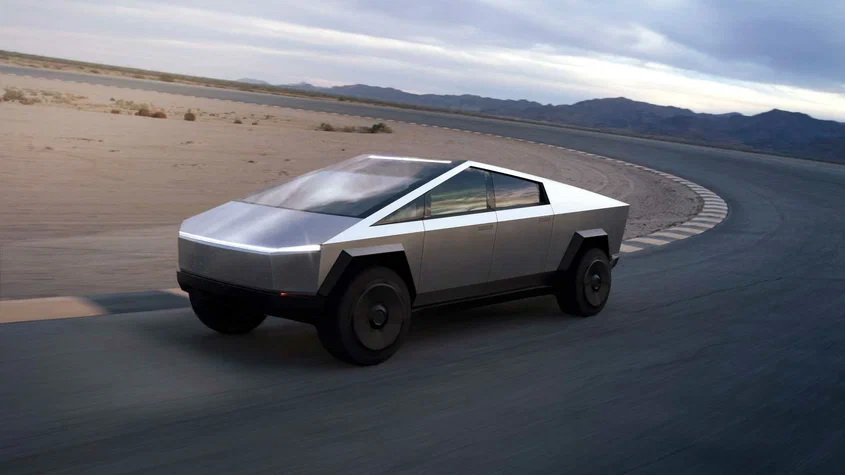

In [ ]:
src = cv.imread(folder+"cybertruck.jpg")
cv2_imshow(src)


# 1. Harris Corner Detector

Chris Harris and Mike Stephens (1988). "[A Combined Corner and Edge Detector](https://bmva-archive.org.uk/bmvc/1988/avc-88-023.pdf)". Alvey Vision Conference. Vol. 15.

Функция [cv2.cornerHarris()](https://docs.opencv.org/3.4/dc/d0d/tutorial_py_features_harris.html):
*   **img** – Input image that should be grayscale and float32 type;
*   **blockSize** – It is the size of the neighborhood considered for corner detection;
*   **ksize** – Aperture parameter of Sobel derivative used;
*   **k** – Harris detector free parameter in the equation (0.04 ≤ k ≤ 0.06).

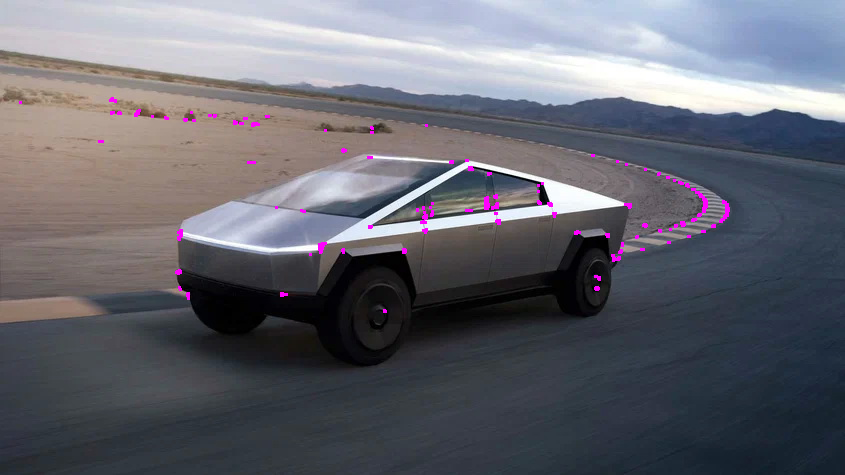

In [ ]:
gray = cv.cvtColor(src, cv.COLOR_BGR2GRAY)
gray = np.float32(gray)

dst = cv.cornerHarris(gray, 2, 3, 0.05)

# Применяем "расширение" (dilation) дабы увеличить размер найденных "углов"
dst = cv.dilate(dst,None)

img = src.copy()
# Устанавливаем порог и добавляем элементы на исходное изображение
img[dst>0.001*dst.max()]=[255, 0, 255]

cv2_imshow(img)

Поменяйте параметры в cv.cornerHarris и значение порога

# Shi-Tomasi Corner Detector
 J. Shi and C. Tomasi, "[Good Features to Track](https://ieeexplore.ieee.org/document/323794)", 9th IEEE Conference on Computer Vision and Pattern Recognition., pp. 593–600, June 1994.

 [Technical report TR 93-1399](https://users.cs.duke.edu/~tomasi/papers/shi/TR_93-1399_Cornell.pdf)

 Функция cv2.goodFeaturesToTrack():
*   **image** – Input 8-bit or floating-point 32-bit, single-channel image;
*   **maxCorners** – Maximum number of corners to detect;
*   **qualityLevel** – Parameter characterizing the minimal accepted quality of image corners;
*   **minDistance** – minimal Euclidean distance between corners.

<ipython-input-16-6c8dbf8d9b4b>:2: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  corners = np.int0(corners) # convert the input array to the default integer type


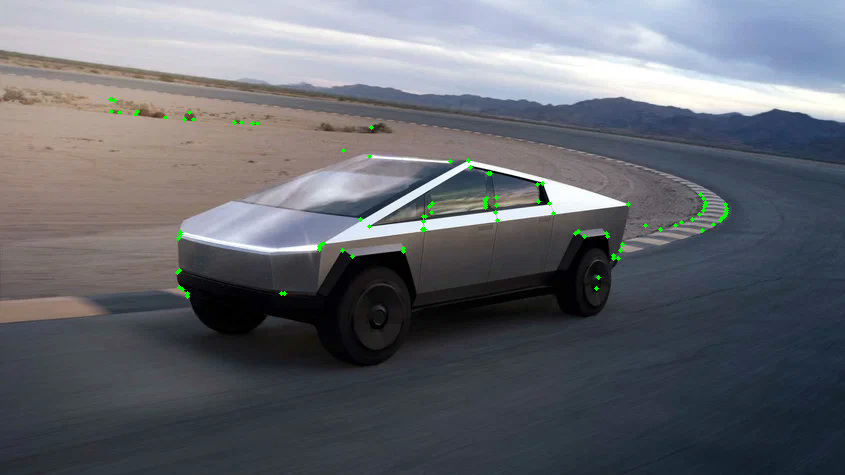

In [ ]:
corners = cv.goodFeaturesToTrack(gray, 100, 0.01, 1)
corners = np.int0(corners) # convert the input array to the default integer type

img = src.copy()
for c in corners:
    x, y = c.ravel()
    cv.circle(img, (x,y), 2, (0, 255, 0), -1)

cv2_imshow(img)

Посмотрим на влияние параметра minDistance.

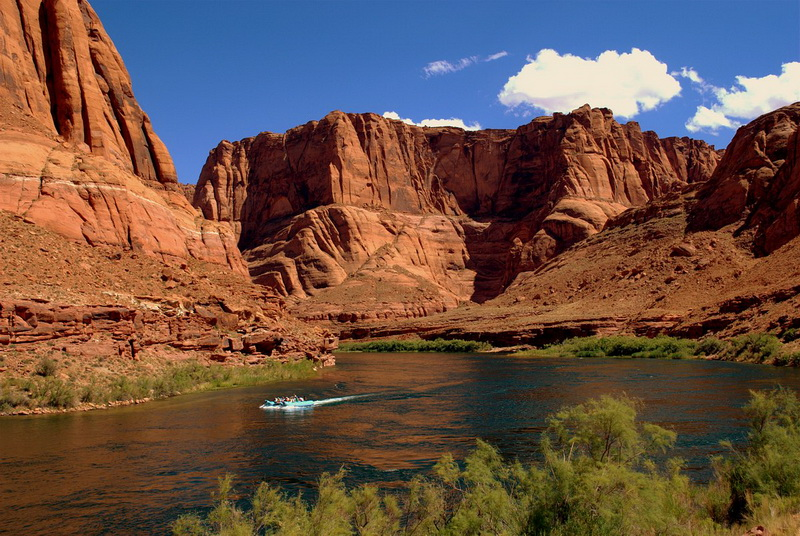

In [ ]:
src = cv.imread(folder+"colorado-river.jpg")
cv2_imshow(src)


<ipython-input-18-c6080d3c245f>:4: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  corners = np.int0(corners)


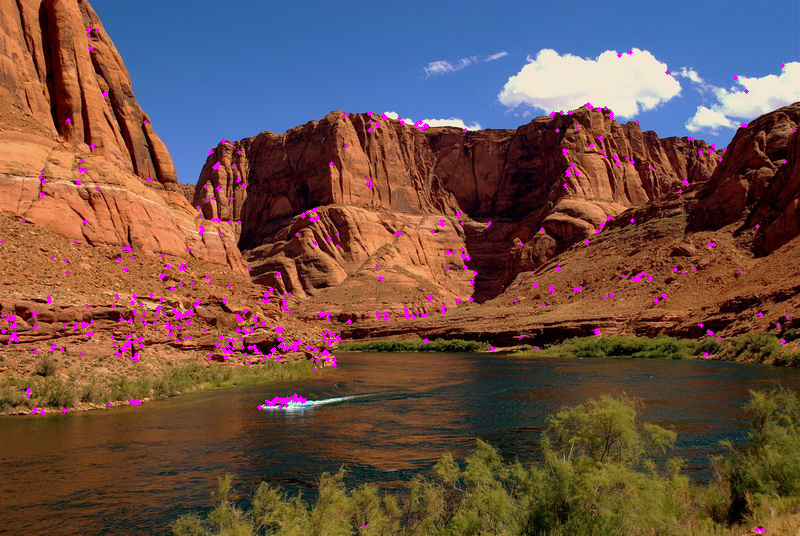

In [ ]:
gray = cv.cvtColor(src, cv.COLOR_BGR2GRAY)

corners = cv.goodFeaturesToTrack(gray, 500, 0.01, 1)
corners = np.int0(corners)

img1 = src.copy()
for c in corners:
    x, y = c.ravel()
    cv.circle(img1, (x,y), 2, (255, 0, 255), -1)

cv2_imshow(img1)

<ipython-input-19-734d65c002e7>:2: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  corners = np.int0(corners)


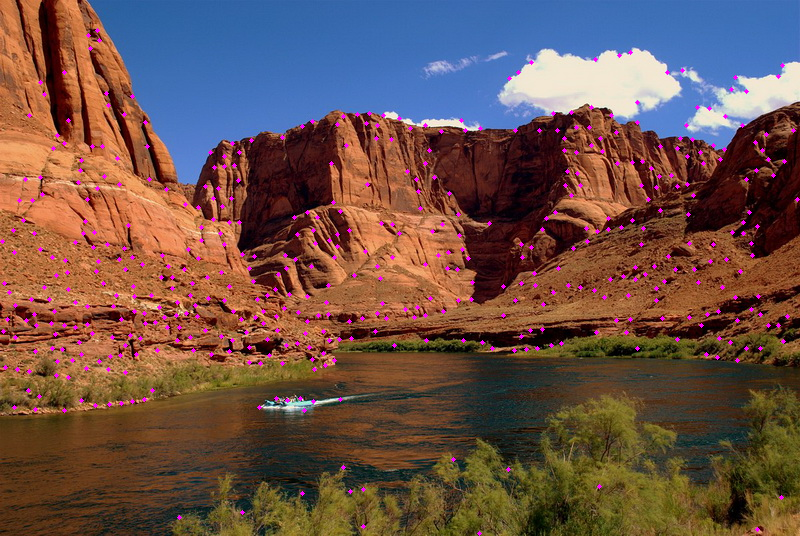

In [ ]:
corners = cv.goodFeaturesToTrack(gray, 500, 0.01, 10)
corners = np.int0(corners)

img2 = src.copy()
for c in corners:
    x, y = c.ravel()
    cv.circle(img2, (x,y), 2, (255, 0, 255), -1)

cv2_imshow(img2)

<ipython-input-20-f41220c7c83b>:2: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  corners = np.int0(corners)


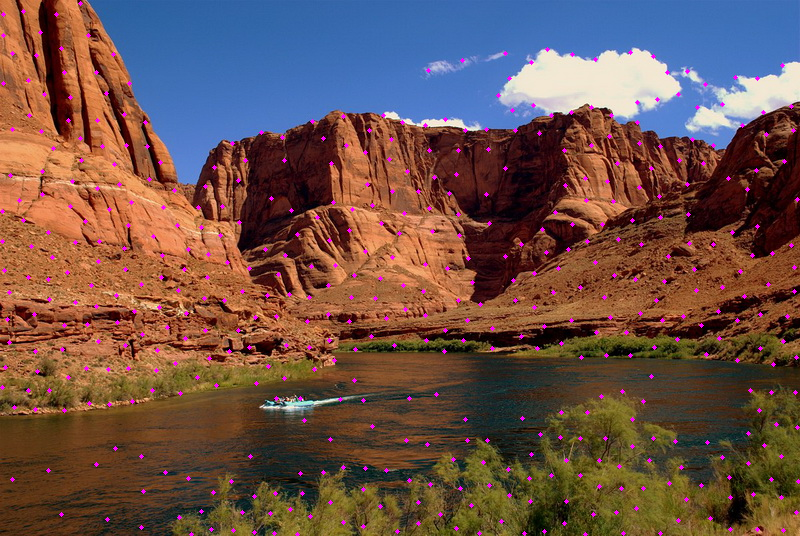

In [ ]:
corners = cv.goodFeaturesToTrack(gray, 500, 0.01, 20)
corners = np.int0(corners)

img3 = src.copy()
for c in corners:
    x, y = c.ravel()
    cv.circle(img3, (x,y), 2, (255, 0, 255), -1)

cv2_imshow(img3)

# 3. Scale Invariant Feature Transform (SIFT)

D. Lowe, [Distinctive image features from scale-invariant keypoints](https://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.157.3843), IJCV 60 (2), pp. 91-110, 2004


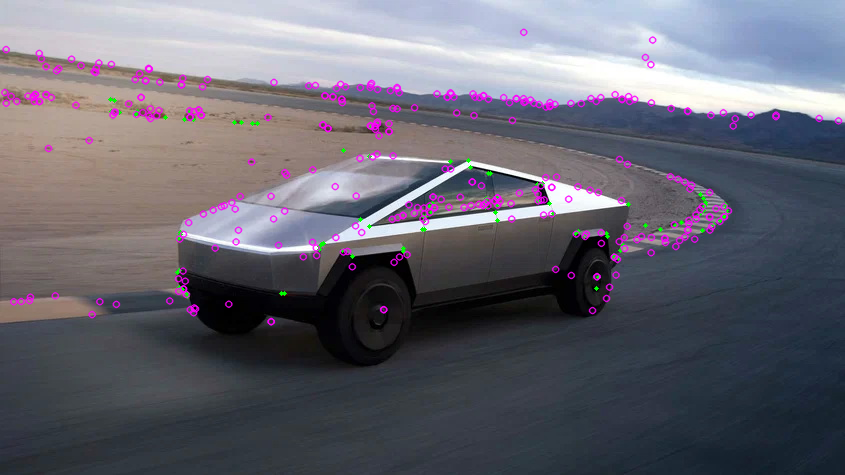

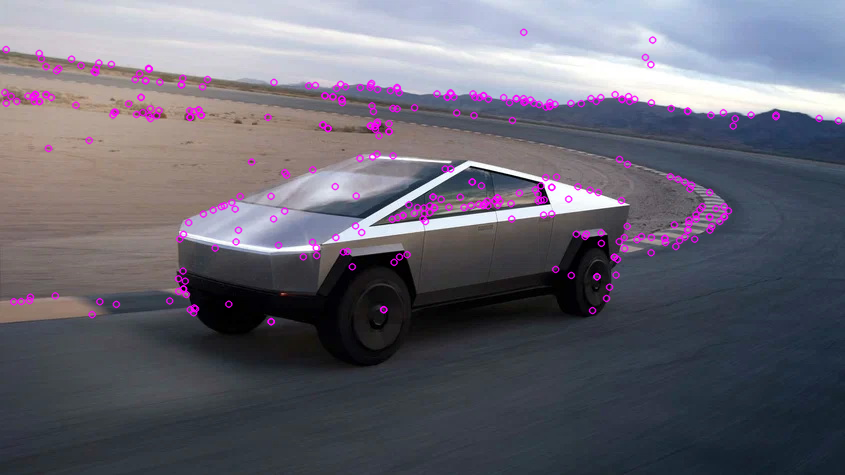

In [ ]:
src = cv.imread(folder+"cybertruck.jpg")
gray = cv.cvtColor(src, cv.COLOR_BGR2GRAY)

sift = cv.xfeatures2d.SIFT_create()

keypoints = sift.detect(gray, None)

cv2_imshow(cv.drawKeypoints(img, keypoints, None, (255, 0, 255)))
cv2_imshow(cv.drawKeypoints(src, keypoints, None, (255, 0, 255)))


In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

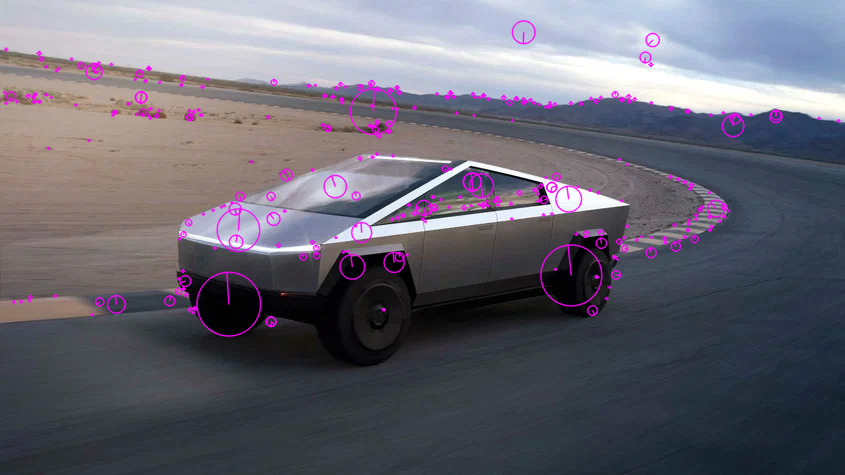

In [ ]:
# Draw circles with keypoint size and orientation
cv2_imshow(cv.drawKeypoints(src.copy(), keypoints, None, (255, 0, 255), flags=cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS))

# 4. Speeded Up Robust Features (SURF)
Herbert Bay, Andreas Ess, Tinne Tuytelaars, and Luc Van Gool, "[Speeded Up Robust Features](https://www.sciencedirect.com/science/article/abs/pii/S1077314207001555)", ETH Zurich, Katholieke Universiteit Leuven

Запатентован.

"Set OPENCV_ENABLE_NONFREE CMake option and rebuild the library in function 'create'."

# 5. Oriented FAST and Rotated BRIEF (ORB)
Ethan Rublee, Vincent Rabaud, Kurt Konolige, and Gary R. Bradski. 2011. OpenCV labs

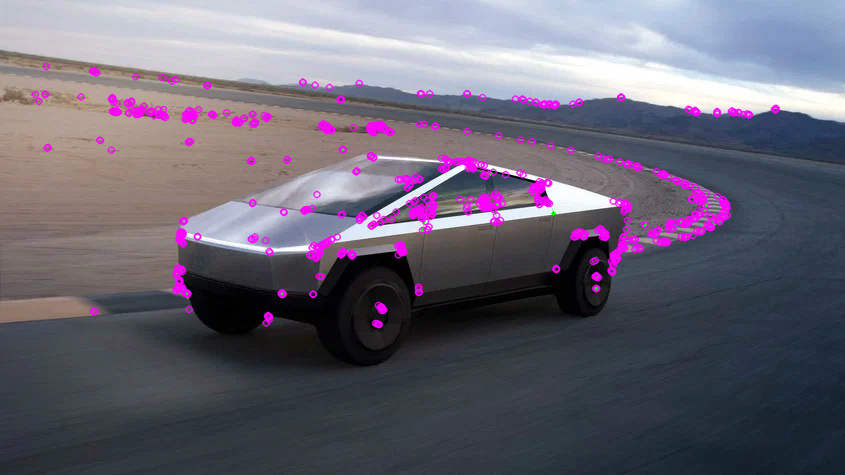

In [ ]:
orb = cv.ORB_create(nfeatures=1000)
keypoints_orb, descriptors = orb.detectAndCompute(src, None)
cv2_imshow(cv.drawKeypoints(img, keypoints_orb, None, (255, 0, 255)))